**You can use Google but don't use ChatGPT and Gemini. You are here to learn. Follow the instructions given below and write the code in that cell only.**


**Dataset Link:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [17]:
# Load the dataset using pandas
import pandas as pd

df = pd.read_csv("WineQT.csv")

print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

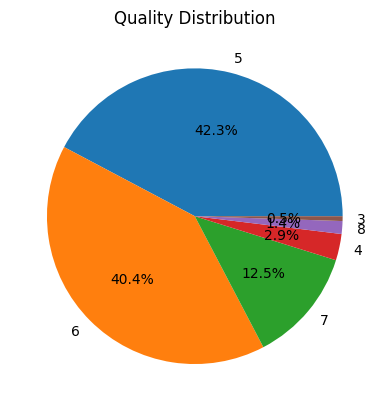

In [18]:
# Plot the pie chart showing how much each quality exist in this dataset
# Your pie chart should have 6 parts with each part representing 1 quality number
# Print out the quality which has the highest percent
import matplotlib.pyplot as plt 

quality_counts = df["quality"].value_counts()

plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%')
plt.title("Quality Distribution")
plt.show()




Text(0, 0.5, 'Mean of total alcohol in that quality of wine')

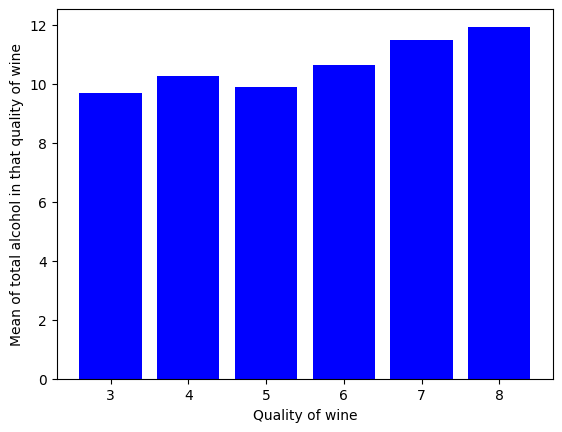

In [19]:
# Plot a bar graph
# X axis: Quality of wine
# Y axis: Mean of total alcohol in that quality of wine
# Suppose quality 5 has 9.4, 9.8, 9.2 as entries in alcohol column then the value will be (9.4 + 9.8 + 9.2)/3
# Hint: use groupby() and mean() methods

mean_alcohol = df.groupby("quality")["alcohol"].mean()
plt.bar(mean_alcohol.index, mean_alcohol.values,color='blue')

plt.xlabel("Quality of wine")
plt.ylabel("Mean of total alcohol in that quality of wine")

In [20]:
# Partition df into X and Y
# Y has only one column which is quality (target)
# X has all the other columns (features)

X = df.drop("quality", axis=1)
Y = df["quality"]
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Id  
0      9.4   0  
1      9.8   1  
2      9.8   2  
3      9.8   3  
4

In [21]:
# Split into train and test datasets using test_size = 0.2 and random_state = 97
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=97)
print(X_train.head())

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
525            7.7             0.965         0.10            2.10      0.112   
637            7.4             0.635         0.10            2.40      0.080   
820            8.5             0.180         0.51            1.75      0.071   
102            7.3             0.330         0.47            2.10      0.077   
197           10.3             0.320         0.45            6.40      0.073   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
525                 11.0                  22.0  0.99630  3.26       0.50   
637                 16.0                  33.0  0.99736  3.58       0.69   
820                 45.0                  88.0  0.99524  3.33       0.76   
102                  5.0                  11.0  0.99580  3.33       0.53   
197                  5.0                  13.0  0.99760  3.23       0.82   

     alcohol    Id  
525      9.5   736  
637     10.8   901  

In [22]:
# Define a function which implements the Min-Max Scaler
# Your function should take a column of X_train as input and returns a list/np array/pd series which is scaled version of that column

import numpy as np

def min_max_scaler(column):
    return (column - column.min()) / (column.max() - column.min())




In [24]:
# Print out the min, max, mean value of the scaled column = 'volatile acidity'
# Print out the min, max, mean value of the scaled column = 'free sulfur dioxide'
# Which has higher min, max and mean value?


print(min_max_scaler(X_train["volatile acidity"]).min())

print(min_max_scaler(X_train["volatile acidity"]).max())

print(min_max_scaler(X_train["volatile acidity"]).mean())

print(min_max_scaler(X_train["free sulfur dioxide"]).min())

print(min_max_scaler(X_train["free sulfur dioxide"]).max())

print(min_max_scaler(X_train["free sulfur dioxide"]).mean())




0.0
1.0
0.2819722130631576
0.0
1.0
0.21704660504915252


volatile acidity has higher mean than free sulfur dioxide else equal

In [25]:
# Perform normalization using sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.head())

print(X_test_scaled.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.274336          0.578767     0.126582        0.082192   0.166945   
1       0.247788          0.352740     0.126582        0.102740   0.113523   
2       0.345133          0.041096     0.645570        0.058219   0.098497   
3       0.238938          0.143836     0.594937        0.082192   0.108514   
4       0.504425          0.136986     0.569620        0.376712   0.101836   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.056537  0.457416  0.347826   0.104938   
1             0.223881              0.095406  0.535242  0.626087   0.222222   
2             0.656716              0.289753  0.379589  0.408696   0.265432   
3             0.059701              0.017668  0.420705  0.408696   0.123457   
4             0.059701              0.024735  0.552863  0.321739   0.302469   

    alcohol        Id  
0  0.169231  0.460864  
1  0.369

**Dataset Link:** https://drive.google.com/file/d/1M_djcbJS8LRZl2Vp5ulESjhzZHMJrNRE/view?usp=sharing

Use this dataset for the below questions, the first column is the target column whereas all the other columns are features.

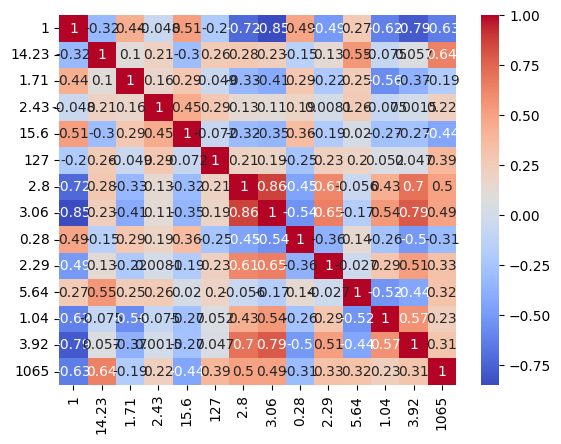

In [33]:
# Print out the correlation matrix of df

df = pd.read_csv("CLS_DATASET.csv")
correlation_matrix = df.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
sns.histplot( kde=True)
plt.show()


In [32]:
# Nothing to code in this cell, just read and understand

# Thumb Rule: If the magnitude of correlation between two features is high (close to 1) then both features are highly related to each other
# This means that one feature can be expressed in the form of other.
# In simple words feature_2 = some_function(feature_1)
# So it is advisable to drop one of the features and consider only one of them for training the machine learning model


# Thumb Rule: If the magnitude of correlation between one feature and target is high (close to 1) then that features is highly related to the target
# We should consider this feature for training the model


# Thumb Rule: If two features are highly correlated with each other and each feature has a high correlation with the target as well
# Then we consider only 1 feature even though both have higher correlation with the target
# We generally consider the feature which has a higher correlation with the target

In [ ]:
# Can you name two columns which show the relation mentioned in rule 1
# The column names are just numbers
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.


column seven and column eight are related with score nearly 0.86 other than that eight and thirteen are related with 0.79 score

For second one u have'nt specified the target so my self assuming the eighth column as target

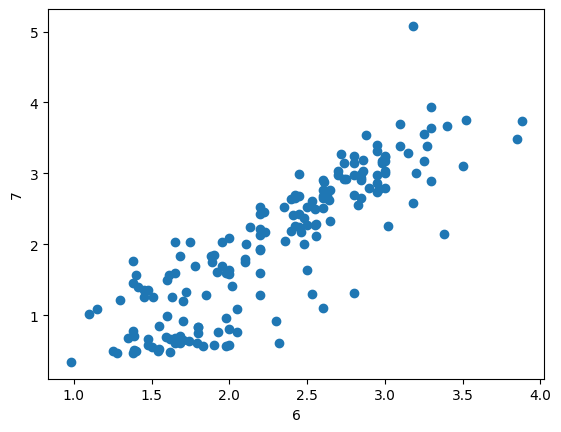

In [39]:
# Can you name two columns which show the relation mentioned in rule 2
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.

df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

plt.scatter(df['6'], df['7'])
plt.xlabel('6')
plt.ylabel('7')
plt.show()


the relation between two columns slightly like a y = mx + c
hence as you specified in rules we can drop either of the columns if both are features

For the thrid question seven and thirteen columns are the ones with specified rules

Text(0, 0.5, '12')

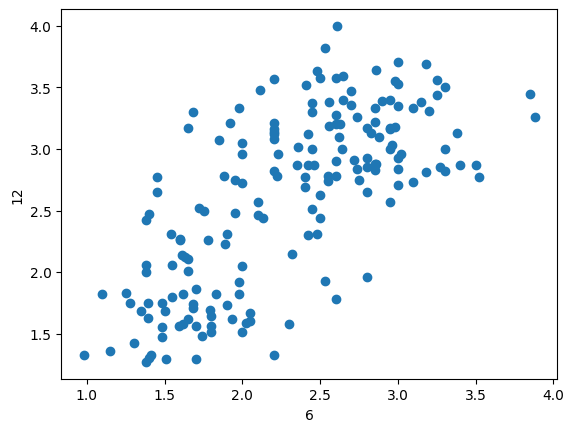

In [40]:
# Can you name two columns which show the relation mentioned in rule 3
# Plot those two columns wrt each other. Do you see a relation? Use scatter plot
# Write in two lines what you observe.


plt.scatter(df['6'], df['12'])
plt.xlabel('6') 
plt.ylabel('12')



**Assignment END<br>
Please submit on teams before the deadline**